<a href="https://colab.research.google.com/github/sgevatschnaider/GraphAI-Data-Science-ML/blob/main/notebooks/TIK_TOK_Material_educativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from IPython.display import display, HTML

# Contenido HTML con el nuevo índice
html_content = """
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Material Elaborado por Sergio Gevatschnaider</title>
    <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&display=swap" rel="stylesheet">
    <style>
        body {
            font-family: 'Roboto', Arial, sans-serif;
            line-height: 1.8;
            margin: 20px;
            padding: 20px;
            background-color: #f9f9f9;
            color: #333;
        }
        h1 {
            color: #2c3e50;
            text-align: center;
            font-size: 2.5em;
            margin-bottom: 20px;
        }
        h2 {
            color: #2980b9;
            font-size: 1.8em;
            margin-top: 30px;
        }
        p {
            font-size: 1.2em;
            margin-bottom: 15px;
        }
        ul {
            list-style-type: square;
            margin-left: 30px;
            margin-bottom: 20px;
        }
        ul ul {
            list-style-type: disc;
            margin-left: 50px;
        }
        li {
            margin-bottom: 10px;
            font-size: 1.1em;
        }
        a {
            color: #2980b9;
            text-decoration: none;
            font-weight: bold;
        }
        a:hover {
            text-decoration: underline;
            color: #1b5c8a;
        }
    </style>
</head>
<body>
    <h1>Material Elaborado por Sergio Gevatschnaider</h1>
    <p>Este material educativo está diseñado para la enseñanza de sistemas de recomendación basados en teoría de grafos y Graph Neural Networks (GNN) en el contexto del Big Data.</p>

    <h2>Índice Teórico y Práctico</h2>
    <ul>
        <li>Fundamentos de Grafos y Sistemas de Recomendación
            <ul>
                <li>Definición de grafos: nodos, aristas y relaciones.</li>
                <li>Grafos bipartitos en sistemas de recomendación.</li>
                <li>Ejemplo de construcción de un grafo de usuarios y videos.</li>
            </ul>
        </li>
        <li>Modelo de Recomendación Basado en Grafos
            <ul>
                <li>Creación de un grafo bipartito con networkx.</li>
                <li>Visualización de interacciones y recomendaciones.</li>
                <li>Comparación entre el grafo de origen y el grafo de recomendaciones.</li>
            </ul>
        </li>
        <li>Graph Neural Networks (GNN) y su Aplicación
            <ul>
                <li>Arquitectura de redes neuronales en grafos.</li>
                <li>Implementación de un modelo GNN con torch-geometric.</li>
                <li>Comparación entre recomendaciones basadas en GNN y filtrado colaborativo tradicional.</li>
            </ul>
        </li>
        <li>Ecuaciones Matemáticas del Modelo
            <ul>
                <li>Fórmula de recomendación: combinación de GNN, contenido y engagement.</li>
                <li>Definición de R_GNN, F_content y F_viral.</li>
                <li>Impacto de los pesos w1, w2, w3 en la función de recomendación.</li>
            </ul>
        </li>
        <li>Entrenamiento y Evaluación del Modelo
            <ul>
                <li>Definición de funciones de pérdida y optimización con torch.optim.Adam.</li>
                <li>Visualización de la evolución de la pérdida (Loss Function).</li>
                <li>Comparación de embeddings de usuarios y videos tras entrenamiento.</li>
            </ul>
        </li>
        <li>Resultados y Visualización
            <ul>
                <li>Interpretación de los embeddings generados.</li>
                <li>Visualización de la contribución de cada factor (GNN, contenido, viralidad).</li>
                <li>Generación de las recomendaciones finales.</li>
            </ul>
        </li>
    </ul>
</body>
</html>
"""

# Mostrar el contenido HTML en Jupyter Notebook o Colab
display(HTML(html_content))


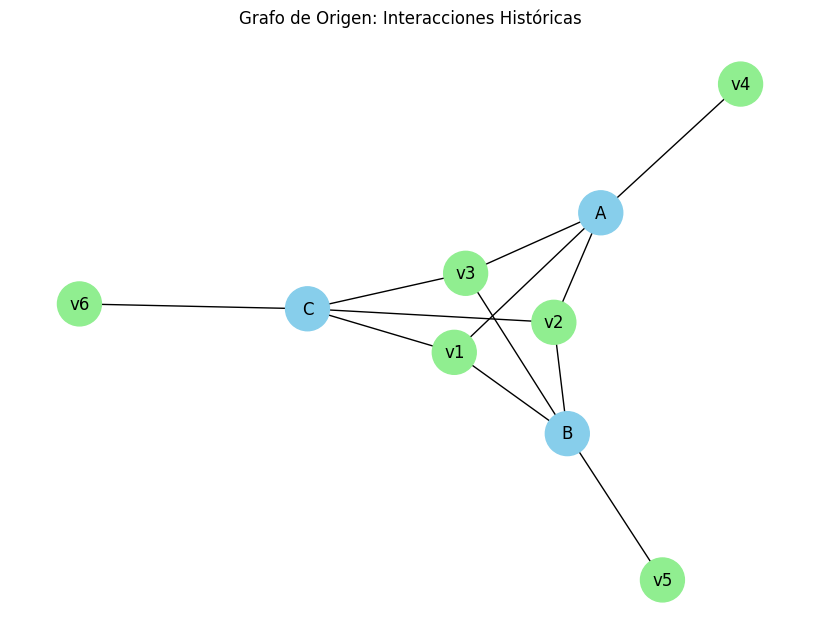

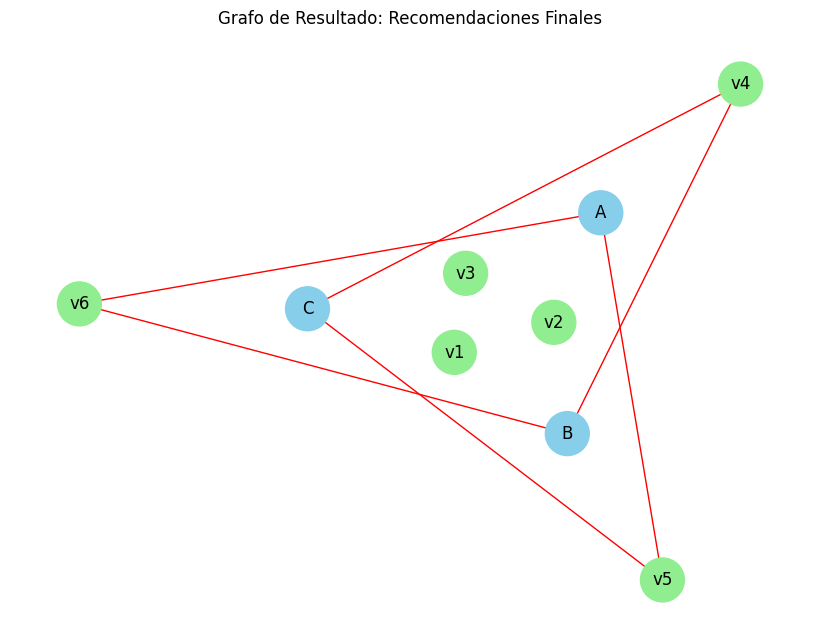

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# -------------------------------------------------
# 1. Definir Usuarios y Videos
# -------------------------------------------------
usuarios = ["A", "B", "C"]
videos = ["v1", "v2", "v3", "v4", "v5", "v6"]

# -------------------------------------------------
# 2. Definir Interacciones Históricas (Origen)
# -------------------------------------------------
# - Usuario A: v1, v2, v3, v4
# - Usuario B: v1, v2, v3, v5
# - Usuario C: v1, v2, v3, v6
aristas_origen = [
    ("A","v1"), ("A","v2"), ("A","v3"), ("A","v4"),
    ("B","v1"), ("B","v2"), ("B","v3"), ("B","v5"),
    ("C","v1"), ("C","v2"), ("C","v3"), ("C","v6")
]

# -------------------------------------------------
# 3. Definir Recomendaciones Finales
# -------------------------------------------------
# Ejemplo: A recomienda v5, v6; B recomienda v4, v6; C recomienda v4, v5
aristas_resultado = [
    ("A","v5"), ("A","v6"),
    ("B","v4"), ("B","v6"),
    ("C","v4"), ("C","v5")
]

# -------------------------------------------------
# 4. Crear Grafo Bipartito para el Origen
# -------------------------------------------------
G_origen = nx.Graph()
G_origen.add_nodes_from(usuarios, bipartite=0)
G_origen.add_nodes_from(videos, bipartite=1)
G_origen.add_edges_from(aristas_origen)

# -------------------------------------------------
# 5. Crear Grafo Bipartito para el Resultado
# -------------------------------------------------
G_resultado = nx.Graph()
G_resultado.add_nodes_from(usuarios, bipartite=0)
G_resultado.add_nodes_from(videos, bipartite=1)
G_resultado.add_edges_from(aristas_resultado)

# -------------------------------------------------
# 6. Visualización: Origen vs. Resultado
# -------------------------------------------------
# Usamos la misma posición (pos) para que los nodos aparezcan en el mismo lugar en ambos grafos
pos = nx.spring_layout(G_origen, seed=42)

# Mapa de colores: azul para usuarios, verde para videos
color_map = []
for node in (usuarios + videos):
    if node in usuarios:
        color_map.append("skyblue")   # Usuarios en azul
    else:
        color_map.append("lightgreen")# Videos en verde

# (a) Grafo Original
plt.figure(figsize=(8,6))
nx.draw(G_origen, pos, with_labels=True, node_color=color_map, node_size=1000, font_size=12)
plt.title("Grafo de Origen: Interacciones Históricas")
plt.show()

# (b) Grafo de Resultado (Recomendaciones)
plt.figure(figsize=(8,6))
nx.draw(G_resultado, pos, with_labels=True, node_color=color_map, node_size=1000, font_size=12, edge_color="red")
plt.title("Grafo de Resultado: Recomendaciones Finales")
plt.show()


Se truncaron las últimas líneas 5000 del resultado de transmisión.
Embeddings tras la capa 3:
 tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.4419, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0148, 0.4426, 0.1393, 0.4042],
        [0.0000, 0.5715, 0.0000, 0.0000, 0.9231, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.3836, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.5564, 0.0000, 0.0000, 0.9697, 0.0000, 0.0000, 0.3266, 0.0000,
         0.0000, 0.0000, 0.0000, 0.7325, 0.0371, 0.0000, 0.4541],
        [0.0000, 0.5621, 0.0000, 0.0000, 1.1671, 0.0000, 0.0000, 0.6612, 0.0000,
         0.0000, 0.0000, 0.0000, 0.6417, 0.3688, 0.0000, 0.0000],
        [0.0000, 0.5715, 0.0000, 0.0000, 1.1707, 0.0000, 0.0000, 0.7266, 0.0000,
         0.0000, 0.0000, 0.0000, 0.6320, 0.0000, 0.0677, 0.4390],
        [0.0000, 0.5979, 0.0000, 0.0000, 1.1655, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.3217, 0.0051, 0.4693],
        [0.1357, 0.0000

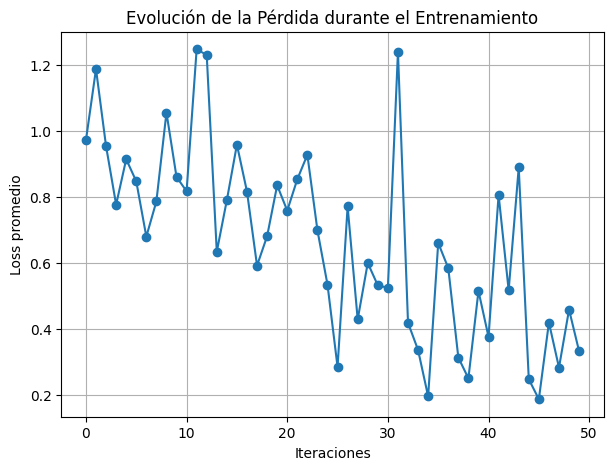


Producto punto entre Usuario A y Video v4: 2.0516


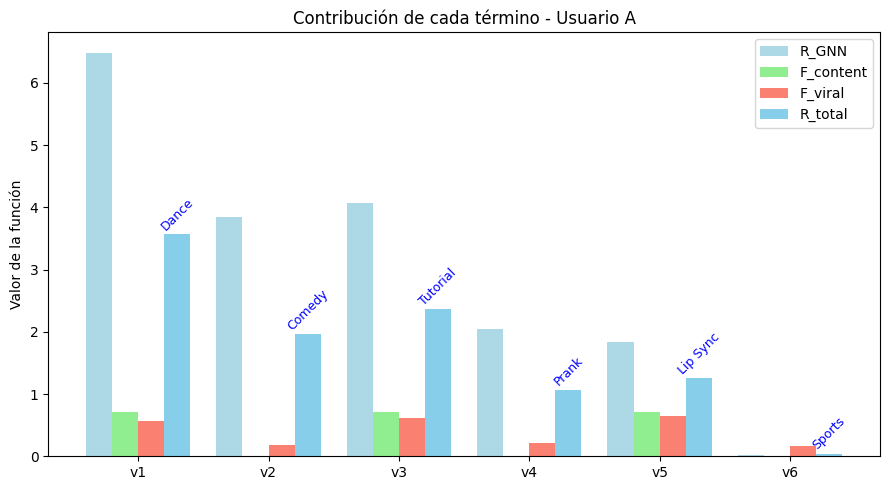

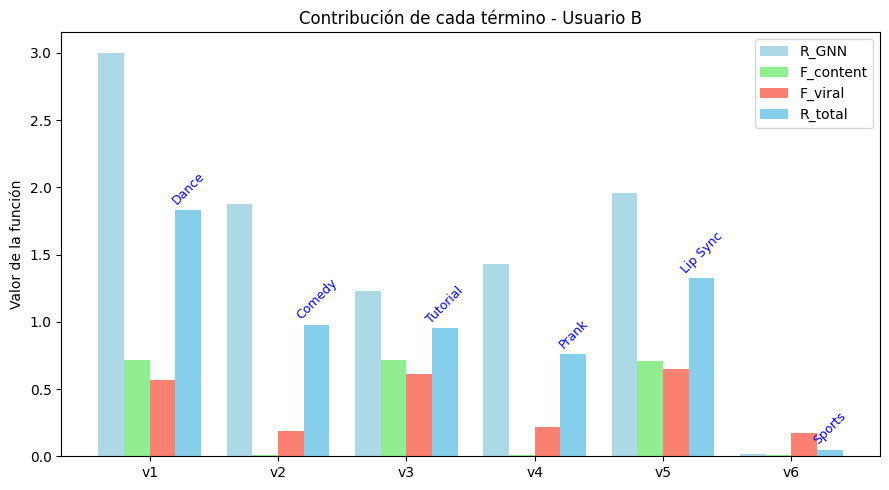

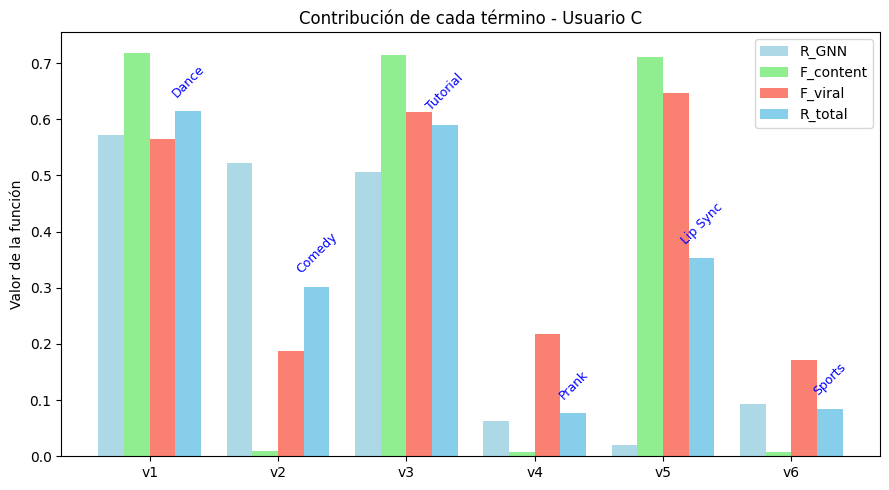


Recomendaciones finales (excluyendo interacciones históricas):

Usuario A -> Recomendaciones:
     R_final      Type
v5  1.261935  Lip Sync
v6  0.044342    Sports

Usuario B -> Recomendaciones:
     R_final    Type
v4  0.761618   Prank
v6  0.045485  Sports

Usuario C -> Recomendaciones:
     R_final      Type
v5  0.352464  Lip Sync
v4  0.076848     Prank


In [2]:
# Si aún no tienes instaladas las librerías, puedes instalarlas (descomenta las siguientes líneas si es necesario):
!pip install torch
!pip install torch-geometric
# !pip install matplotlib
# !pip install pandas

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import Data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# -----------------------------------------------------
# 1. Preparación del Grafo y Datos Iniciales
# -----------------------------------------------------

usuarios = ['A', 'B', 'C']
videos = ['v1', 'v2', 'v3', 'v4', 'v5', 'v6']
nodos = usuarios + videos

node2idx = {node: i for i, node in enumerate(nodos)}

aristas = [
    ('A', 'v1'), ('A', 'v2'), ('A', 'v3'), ('A', 'v4'),
    ('B', 'v1'), ('B', 'v2'), ('B', 'v3'), ('B', 'v5'),
    ('C', 'v1'), ('C', 'v2'), ('C', 'v3'), ('C', 'v6')
]
edge_index = torch.tensor(
    [[node2idx[u], node2idx[v]] for u, v in aristas] +
    [[node2idx[v], node2idx[u]] for u, v in aristas],
    dtype=torch.long
).t().contiguous()

num_nodes = len(nodos)
in_dim = 16
x = torch.randn((num_nodes, in_dim), dtype=torch.float)

data = Data(x=x, edge_index=edge_index)

# -----------------------------------------------------
# 2. Definición del Modelo GNN (GAT) con impresión intermedia
# -----------------------------------------------------
class GNNRecommendationModel(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, num_layers=3, dropout=0.3, verbose=False):
        super(GNNRecommendationModel, self).__init__()
        self.verbose = verbose
        self.convs = nn.ModuleList()
        self.convs.append(GATConv(in_channels, hidden_channels, heads=2, concat=True))
        for _ in range(num_layers - 2):
            self.convs.append(GATConv(hidden_channels*2, hidden_channels, heads=2, concat=True))
        self.convs.append(GATConv(hidden_channels*2, out_channels, heads=1, concat=False))
        self.dropout = dropout

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        if self.verbose:
            print("Embeddings iniciales:\n", x)  # Embeddings iniciales

        for i, conv in enumerate(self.convs):
            x = conv(x, edge_index)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
            if self.verbose:
                print(f"\nEmbeddings tras la capa {i+1}:\n", x)

        return x

model = GNNRecommendationModel(
    in_channels=16,
    hidden_channels=32,
    out_channels=16,
    num_layers=3,
    dropout=0.3,
    verbose=True # Pon True si quieres imprimir en cada forward
)

# -----------------------------------------------------
# 3. Ecuación de Recomendación: GNN + Contenido + Viral
# -----------------------------------------------------

def R_GNN(user_idx, video_idx):
    return torch.dot(user_embeddings[user_idx], video_embeddings[video_idx])

video_properties = {
    'v1': {'H': 1, 'D': 15, 'Likes': 100, 'Comments': 20, 'Shares': 5,  'type': 'Dance'},
    'v2': {'H': 0, 'D': 30, 'Likes': 50,  'Comments': 10, 'Shares': 2,  'type': 'Comedy'},
    'v3': {'H': 1, 'D': 20, 'Likes': 150, 'Comments': 30, 'Shares': 10, 'type': 'Tutorial'},
    'v4': {'H': 0, 'D': 40, 'Likes': 80,  'Comments': 15, 'Shares': 3,  'type': 'Prank'},
    'v5': {'H': 1, 'D': 25, 'Likes': 200, 'Comments': 40, 'Shares': 20, 'type': 'Lip Sync'},
    'v6': {'H': 0, 'D': 35, 'Likes': 60,  'Comments': 5,  'Shares': 1,  'type': 'Sports'}
}

w1 = nn.Parameter(torch.tensor(0.5))
w2 = nn.Parameter(torch.tensor(0.3))
w3 = nn.Parameter(torch.tensor(0.2))

alpha = 0.7
_lambda = 0.1

def F_content(video):
    props = video_properties[video]
    H_v = props['H']
    D_v = props['D']
    return alpha * H_v + (1 - alpha)*(1/(1 + D_v))

def F_viral(video):
    props = video_properties[video]
    p_engagement = (props['Likes'] + props['Comments'] + props['Shares']) / props['D']
    return 1 - np.exp(-_lambda * p_engagement)

def R_final(user, video):
    user_idx = usuarios.index(user) if isinstance(user, str) else user
    video_idx = videos.index(video)
    return (w1 * R_GNN(user_idx, video_idx) +
            w2 * F_content(video) +
            w3 * F_viral(video))

# -----------------------------------------------------
# 4. Interacciones Históricas y Bucle de Entrenamiento
# -----------------------------------------------------

historical_interactions = {
    'A': ['v1', 'v2', 'v3', 'v4'],
    'B': ['v1', 'v2', 'v3', 'v5'],
    'C': ['v1', 'v2', 'v3', 'v6']
}

idx_usuarios = torch.tensor([node2idx[u] for u in usuarios])
idx_videos   = torch.tensor([node2idx[v] for v in videos])

optimizer = torch.optim.Adam(
    list(model.parameters()) + [w1, w2, w3],
    lr=0.005, weight_decay=5e-4
)
criterion = nn.MarginRankingLoss(margin=1.0)
loss_history = []

def train(data, epochs=50, verbose=False):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()

        # Forward pass del modelo GNN
        embeddings = model(data)

        # Separamos embeddings de usuarios y videos
        global user_embeddings, video_embeddings
        user_embeddings = embeddings[idx_usuarios]
        video_embeddings = embeddings[idx_videos]

        loss_total = 0.0
        count = 0

        for user in usuarios:
            u_idx = usuarios.index(user)
            pos_videos = historical_interactions[user]
            neg_videos = list(set(videos) - set(pos_videos))
            for pos_video in pos_videos:
                pos_score = torch.dot(user_embeddings[u_idx], video_embeddings[videos.index(pos_video)])
                for neg_video in neg_videos:
                    neg_score = torch.dot(user_embeddings[u_idx], video_embeddings[videos.index(neg_video)])
                    target = torch.ones(1)
                    loss = criterion(pos_score.unsqueeze(0), neg_score.unsqueeze(0), target)
                    loss_total += loss
                    count += 1

        if count > 0:
            loss_total /= count

        loss_total.backward()
        optimizer.step()
        loss_history.append(loss_total.item())

        if verbose and epoch % 10 == 0:
            print(f"Epoch {epoch}: Loss = {loss_total.item()}")

node_embeddings = train(data, epochs=50, verbose=True)

# -----------------------------------------------------
# 5. Visualizar Evolución de la Pérdida
# -----------------------------------------------------
plt.figure(figsize=(7,5))
plt.plot(loss_history, marker='o')
plt.title("Evolución de la Pérdida durante el Entrenamiento")
plt.xlabel("Iteraciones")
plt.ylabel("Loss promedio")
plt.grid(True)
plt.show()

# -----------------------------------------------------
# 6. Mostrar un Ejemplo de Producto Punto
# -----------------------------------------------------
# Supongamos que queremos ver la similitud entre el usuario A (índice 0) y el video v4 (índice 3 en la lista videos).
# (Porque videos = ['v1','v2','v3','v4','v5','v6'], v4 es índice 3)
user_A_idx = usuarios.index('A')
video_v4_idx = videos.index('v4')

similaridad_A_v4 = torch.dot(user_embeddings[user_A_idx], video_embeddings[video_v4_idx]).item()
print(f"\nProducto punto entre Usuario A y Video v4: {similaridad_A_v4:.4f}")

# -----------------------------------------------------
# 7. Calcular y Visualizar la Contribución de Cada Término
# -----------------------------------------------------
user_scores = {}
for user in usuarios:
    scores = {}
    for video in videos:
        r_gnn = R_GNN(usuarios.index(user), videos.index(video)).item()
        f_cont = F_content(video)
        f_vir = F_viral(video)
        r_tot = R_final(user, video).item()
        scores[video] = {
            'R_GNN': r_gnn,
            'F_content': f_cont,
            'F_viral': f_vir,
            'R_final': r_tot,
            'Type': video_properties[video]['type']
        }
    user_scores[user] = pd.DataFrame(scores).T

for user in usuarios:
    df = user_scores[user]
    videos_sorted = df.index.tolist()

    r_gnn_vals = df['R_GNN'].values
    f_cont_vals = df['F_content'].values
    f_vir_vals  = df['F_viral'].values
    r_tot_vals  = df['R_final'].values

    x = np.arange(len(videos_sorted))
    width = 0.2

    fig, ax = plt.subplots(figsize=(9,5))
    rects1 = ax.bar(x - 1.5*width, r_gnn_vals, width, label='R_GNN', color='lightblue')
    rects2 = ax.bar(x - 0.5*width, f_cont_vals, width, label='F_content', color='lightgreen')
    rects3 = ax.bar(x + 0.5*width, f_vir_vals,  width, label='F_viral', color='salmon')
    rects4 = ax.bar(x + 1.5*width, r_tot_vals,  width, label='R_total', color='skyblue')

    ax.set_xticks(x)
    ax.set_xticklabels(videos_sorted)
    ax.set_ylabel("Valor de la función")
    ax.set_title(f"Contribución de cada término - Usuario {user}")
    ax.legend()

    for i, video in enumerate(videos_sorted):
        video_type = df.loc[video, 'Type']
        ax.text(x[i] + 1.5*width, r_tot_vals[i] + 0.02, video_type,
                ha='center', va='bottom', fontsize=9, color='blue', rotation=45)

    plt.tight_layout()
    plt.show()

# -----------------------------------------------------
# 8. Recomendaciones Filtradas
# -----------------------------------------------------
union_unique = {'v4', 'v5', 'v6'}
print("\nRecomendaciones finales (excluyendo interacciones históricas):")
for user in usuarios:
    df_scores = user_scores[user]
    historical = set(historical_interactions[user])
    rec_set = union_unique - historical
    rec_df = df_scores[df_scores.index.isin(rec_set)]
    rec_sorted = rec_df.sort_values('R_final', ascending=False)
    print(f"\nUsuario {user} -> Recomendaciones:")
    print(rec_sorted[['R_final', 'Type']])
